In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.ensemble import *

In [68]:
df=pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [70]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [71]:
df.drop(columns=["UDI", "Product ID"], inplace=True)

In [ ]:
#Encoding the values
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])
df["Failure Type"] = label_encoder.fit_transform(df["Failure Type"])

In [73]:
scaler = StandardScaler()
num_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [74]:
print(df.head())
print(df["Target"].value_counts(normalize=True))

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.282200        -1.695984       0             1  
1     0.633308        -1.648852       0             1  
2     0.944290        -1.617430       0             1  
3    -0.048845        -1.586009       0             1  
4     0.001313        -1.554588       0             1  
Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Target"])
y = df["Target"]

# Applying SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Increase failures to 30% of non-failures
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking new class balance
print("New Target Distribution:\n", y_resampled.value_counts(normalize=True))

New Target Distribution:
 Target
0    0.769249
1    0.230751
Name: proportion, dtype: float64


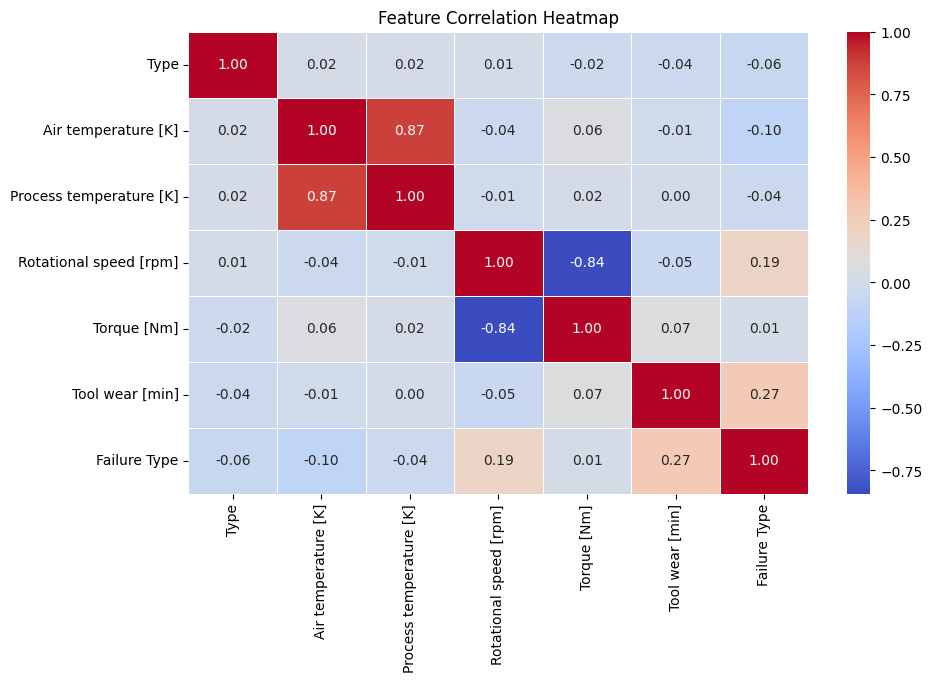

In [76]:
corr_matrix = X_resampled.corr()

#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


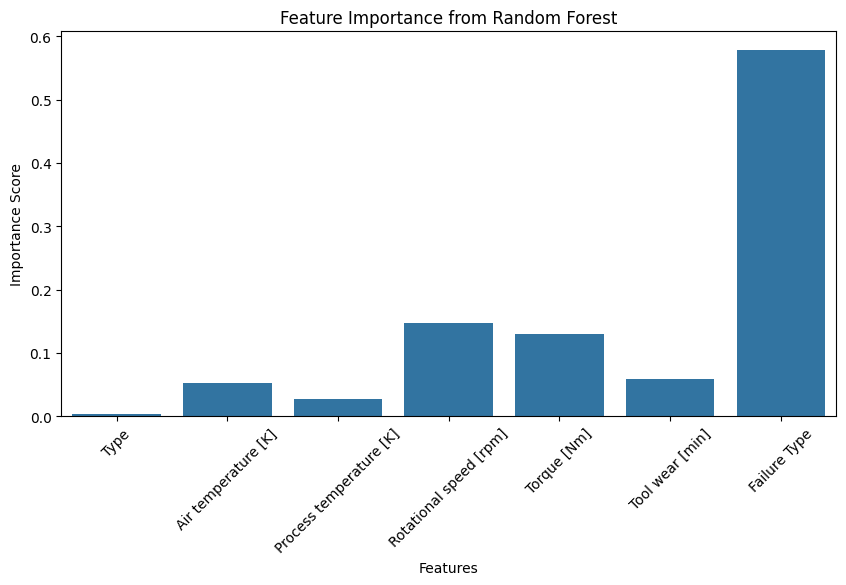

In [77]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

feature_importance = rf_model.feature_importances_

# Ploting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_importance)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()


In [ ]:
#droping the columns that are less important
df.drop(columns=["Type", "Process temperature [K]"], inplace=True)
df.describe()

,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,-9.322321e-16,-2.330580e-16,5.424994e-16,1.051603e-16,0.033900,1.039000
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.180981,0.379069
min,-2.352278e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00,0.000000,0.000000
25%,-8.523974e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01,0.000000,1.000000
50%,4.753123e-02,-1.995597e-01,1.134481e-02,7.698234e-04,0.000000,1.000000
75%,7.474757e-01,4.084443e-01,6.834663e-01,8.491466e-01,0.000000,1.000000
max,2.247357e+00,7.514840e+00,3.672902e+00,2.278819e+00,1.000000,5.000000


In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Target"])
y = df["Target"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (8000, 5)
Testing set size: (2000, 5)


In [ ]:
from sklearn.metrics import *
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.99      0.97      0.98        68

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1931    1]
 [   2   66]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Test set accuracy:", rf_model.score(X_test, y_test))


Cross-validation accuracy scores: [0.99875  0.998125 0.999375 0.999375 1.      ]
Mean CV accuracy: 0.999125
Test set accuracy: 0.9985
